# IMPORT DATA

In [1]:
# importing all libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # data visualization
import seaborn as sns                                 # enhanced data visualization
import numpy as np                                    # numpy for math
import statsmodels.formula.api as smf                 # linear regression (statsmodels)
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression     # linear regression (scikit-learn)
import sklearn.linear_model                           # linear models

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
df = pd.read_excel(io=file)

In [2]:
df.shape

# formatting and printing the dimensions of the dataset
print(f"""
Size of Company Dataset
------------------------
Observations: {df.shape[0]}
Features:     {df.shape[1]}
""")


Size of Company Dataset
------------------------
Observations: 1946
Features:     28



# FEATURE ENGINEERING


## Transform y-variable (Revenue)

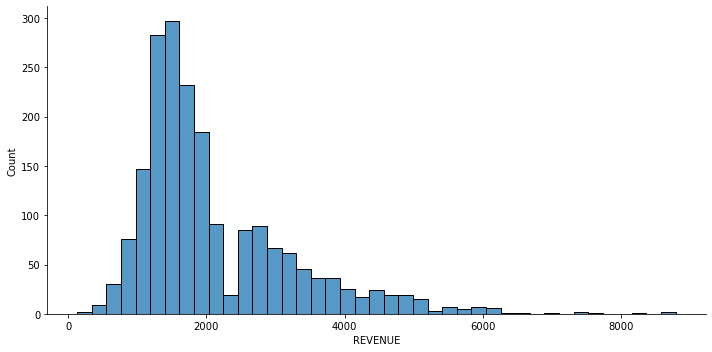

In [3]:
# developing a histogram using DISPLOT for REVENUE variable
sns.displot(data   = df,
            x      = df.loc[:,'REVENUE'],
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()


In [4]:
# log transforming REVENUE and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])

## All variables that contain 0

In [5]:
#counting the 0 value of these variables
total_photos_zeroes = df['TOTAL_PHOTOS_VIEWED'].value_counts()[0] 
cancel_before_noon  = df['CANCELLATIONS_BEFORE_NOON'].value_counts()[0] 
cancel_after_noon   = df['CANCELLATIONS_AFTER_NOON'].value_counts()[0] 
master_class        = df['MASTER_CLASSES_ATTENDED'].value_counts()[0] 
weekly_plan         = df['WEEKLY_PLAN'].value_counts()[0]
early_delivery      = df['EARLY_DELIVERIES'].value_counts()[0]
late_delivery       = df['LATE_DELIVERIES'].value_counts()[0]

# printing a table of the results
print(f"""
                       No\t\tYes
                     ---------------------
Total photos         | {total_photos_zeroes}\t\t{len(df) - total_photos_zeroes}
Cancel before noon   | {cancel_before_noon}\t\t{len(df) - cancel_before_noon}
Cancel after noon    | {cancel_after_noon}\t\t{len(df) - cancel_after_noon}
Total class          | {master_class}\t\t{len(df) - master_class}
Total weekly plan    | {weekly_plan}\t\t{len(df) - weekly_plan}
Total early delivery | {early_delivery}\t\t{len(df) - early_delivery}
Total late delivery  | {late_delivery}\t\t{len(df) - late_delivery}

""")


                       No		Yes
                     ---------------------
Total photos         | 1140		806
Cancel before noon   | 667		1279
Cancel after noon    | 1667		279
Total class          | 932		1014
Total weekly plan    | 468		1478
Total early delivery | 1167		779
Total late delivery  | 319		1627




In [6]:
# dummy variable for having feature
df['HAS_PHOTOS']               = 0
df['HAS_CANCEL_BEFORE_NOON']   = 0
df['HAS_CANCEL_AFTER_NOON']    = 0
df['HAS_CLASS']                = 0
df['HAS_WEEKLY_PLAN']          = 0
df['HAS_EARLY_DELIVERY']       = 0
df['HAS_LATE_DELIVERY']        = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in df.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        df.loc[index, 'HAS_PHOTOS'] = 1
        
    # TOTAL CANCELLED ORDERS BEFORE NOON
    if df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        df.loc[index, 'HAS_CANCEL_BEFORE_NOON'] = 1
        
    # TOTAL CANCELLED ORDERS AFTER NOON   
    if df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        df.loc[index, 'HAS_CANCEL_AFTER_NOON'] = 1
    
    # TOTAL MASTER CLASS   
    if df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        df.loc[index, 'HAS_CLASS'] = 1
        
    # TOTAL WEEKLY PLAN   
    if df.loc[index, 'WEEKLY_PLAN'] > 0:
        df.loc[index, 'HAS_WEEKLY_PLAN'] = 1
        
    # TOTAL EARLY DELIVERY  
    if df.loc[index, 'EARLY_DELIVERIES'] > 0:
        df.loc[index, 'HAS_EARLY_DELIVERY'] = 1   
        
    # TOTAL LATE DELIVERY  
    if df.loc[index, 'LATE_DELIVERIES'] > 0:
        df.loc[index, 'HAS_LATE_DELIVERY'] = 1 
        
df[['HAS_PHOTOS', 'HAS_CANCEL_BEFORE_NOON', 'HAS_CANCEL_AFTER_NOON',\
    'HAS_CLASS', 'HAS_WEEKLY_PLAN','HAS_EARLY_DELIVERY','HAS_LATE_DELIVERY' ]].head()

,HAS_PHOTOS,HAS_CANCEL_BEFORE_NOON,HAS_CANCEL_AFTER_NOON,HAS_CLASS,HAS_WEEKLY_PLAN,HAS_EARLY_DELIVERY,HAS_LATE_DELIVERY
0,0,1,1,0,0,0,1
1,1,0,0,0,1,0,1
2,0,1,0,0,1,0,1
3,0,1,0,0,1,0,1
4,1,0,0,1,1,0,1


In [7]:
# developing a small correlation matrix
zeroes_corr = df.corr()    


# checking the correlations of the newly-created variables with REVENUE
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['HAS_PHOTOS', 'HAS_CANCEL_BEFORE_NOON',\
                'HAS_CANCEL_AFTER_NOON', 'HAS_CLASS', 'HAS_WEEKLY_PLAN',\
               'HAS_EARLY_DELIVERY','HAS_LATE_DELIVERY' ]]\
                .sort_values(ascending = False)

HAS_CLASS                 0.453022
HAS_PHOTOS                0.372072
HAS_CANCEL_BEFORE_NOON    0.024267
HAS_EARLY_DELIVERY        0.013471
HAS_LATE_DELIVERY        -0.017615
HAS_WEEKLY_PLAN          -0.032196
HAS_CANCEL_AFTER_NOON    -0.040339
Name: REVENUE, dtype: float64

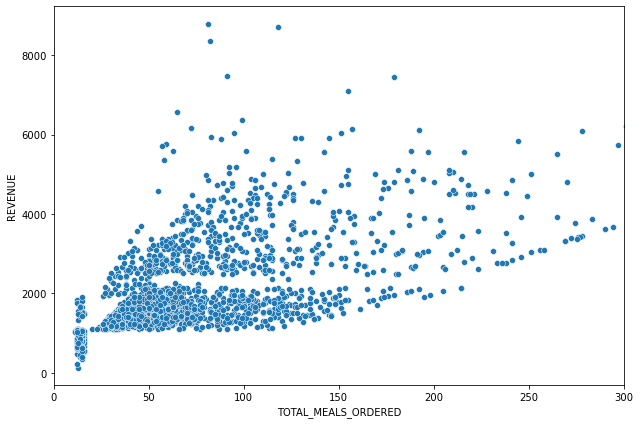

In [8]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot (x    = "TOTAL_MEALS_ORDERED",
                 y    = "REVENUE",
                 data = df)

plt.xlim(0, 300)

# SHOWing the results
plt.tight_layout()
plt.show()

In [9]:
df['HAS_TOTAL_MEALS_ORDERED']               = 0

for index, value in df.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_MEALS_ORDERED'] >= 20:
        df.loc[index, 'HAS_TOTAL_MEALS_ORDERED'] = 1

df[['HAS_TOTAL_MEALS_ORDERED']].head()

,HAS_TOTAL_MEALS_ORDERED
0,0
1,1
2,0
3,0
4,1


## Log transformed variables

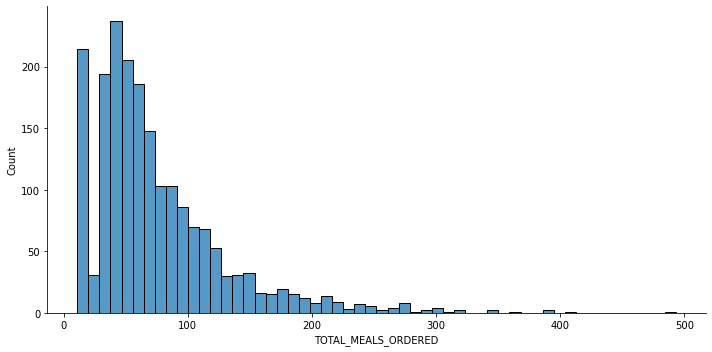

In [10]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = df.loc[:,'TOTAL_MEALS_ORDERED'],
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

#It is skewed (positive)

In [11]:
#log transformation
df['log_TOTAL_MEALS_ORDERED'] = np.log10(df['TOTAL_MEALS_ORDERED'])

#Check correlation with y-variable and log(y) 
log_corr = df.loc[ : , ['TOTAL_MEALS_ORDERED',
                        'log_TOTAL_MEALS_ORDERED',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#results
log_corr.loc[ ['TOTAL_MEALS_ORDERED', 'log_TOTAL_MEALS_ORDERED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
TOTAL_MEALS_ORDERED,0.60,0.61
log_TOTAL_MEALS_ORDERED,0.61,0.69


In [12]:
#log transformation
df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(df['AVG_TIME_PER_SITE_VISIT'])


#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['AVG_TIME_PER_SITE_VISIT',
                        'log_AVG_TIME_PER_SITE_VISIT',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


# Results
log_corr.loc[ ['AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_TIME_PER_SITE_VISIT,0.14,0.14
log_AVG_TIME_PER_SITE_VISIT,0.15,0.15


In [13]:
#Log transformation
df['log_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['UNIQUE_MEALS_PURCH',
                        'log_UNIQUE_MEALS_PURCH',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13


In [14]:
#Log transformations
df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE',
                        'log_CONTACTS_W_CUSTOMER_SERVICE',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05


In [15]:
#Log transformation
df['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(df['PRODUCT_CATEGORIES_VIEWED'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['PRODUCT_CATEGORIES_VIEWED',
                        'log_PRODUCT_CATEGORIES_VIEWED',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['PRODUCT_CATEGORIES_VIEWED', 'log_PRODUCT_CATEGORIES_VIEWED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
PRODUCT_CATEGORIES_VIEWED,0.03,0.04
log_PRODUCT_CATEGORIES_VIEWED,0.01,0.01


In [16]:
#Log transformation
df['log_PC_LOGINS'] = np.log10(df['PC_LOGINS'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['PC_LOGINS',
                        'log_PC_LOGINS',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['PC_LOGINS', 'log_PC_LOGINS'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
PC_LOGINS,0.02,0.01
log_PC_LOGINS,0.01,0.01


In [17]:
#Log transformation
df['log_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['LARGEST_ORDER_SIZE',
                        'log_LARGEST_ORDER_SIZE',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45


In [18]:
#Log transformation
df['log_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['MEDIAN_MEAL_RATING',
                        'log_MEDIAN_MEAL_RATING',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#results
log_corr.loc[ ['MEDIAN_MEAL_RATING', 'log_MEDIAN_MEAL_RATING'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61


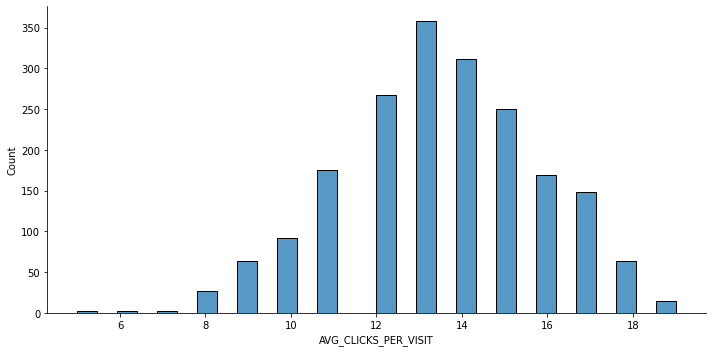

In [19]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = df.loc[:,'AVG_CLICKS_PER_VISIT'],
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

#It is skewed (negative)

In [20]:
#Log transformation
df['log_AVG_CLICKS_PER_VISIT'] = np.log10(df['AVG_CLICKS_PER_VISIT'])

#Check correlation with y-variable and log(y)
log_corr = df.loc[ : , ['AVG_CLICKS_PER_VISIT',
                        'log_AVG_CLICKS_PER_VISIT',
                        'REVENUE',
                        'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#Results
log_corr.loc[ ['AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


## Categorical variables

### Binning Rating and get dummy

In [21]:
#Numerical Binning 
df['bin_rating'] = pd.cut(df['MEDIAN_MEAL_RATING'], bins=[0,1,2,3,4,5],\
                   labels=["Very_Bad","Bad", "OK", "Good", "Very_Good"])

# Prepare the data (code it into number)
# One hot encoding categorical variables
one_hot_bin_rating     = pd.get_dummies(df['bin_rating'])

# dropping categorical variables after they've been encoded
df = df.drop('bin_rating', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_bin_rating])

# saving new columns
new_columns = df.columns

### Binning Attend Master Class and get dummy

In [22]:
#Numerical Binning Example
df['bin_attend_class'] = pd.cut(df['MASTER_CLASSES_ATTENDED'], bins=[-1,0,1,2,3],\
                   labels=["No_class","Elementary","Intermediate", "Advanced"])

#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_bin_attend_class     = pd.get_dummies(df['bin_attend_class'])

# dropping categorical variables after they've been encoded
df = df.drop('bin_attend_class', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_bin_attend_class])

# saving new columns
new_columns = df.columns

### Email domain

In [23]:
# STEP 1: splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df.head()

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com


In [24]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['user_name','email_domain']


# concatenating personal_email_domain with df DataFrame
df = pd.concat([df, email_df['email_domain']],
                        axis = 1)


# printing value counts of email_domain
df.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
mcdonalds.com        28
merck.com            28
cocacola.com         28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
microsoft.com        25
chevron.com          25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
mmm.com              22
verizon.com          22
caterpillar.com      22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [25]:
# email domain types (based on the case)
personal            = [     '@gmail.com', '@protonmail.com','@yahoo.com']

junk                = [     '@msn.com'          ,          
                            '@aol.com'          ,          
                            '@passport.com'     ,         
                            '@hotmail.com'      ,         
                            '@live.com'         ,         
                            '@me.com']

professional  =   [         '@amex.com',             
                            '@merck.com'       ,   
                            '@cocacola.com'    ,       
                            '@jnj.com'         ,     
                            '@mcdonalds.com'   ,     
                            '@nike.com'        ,     
                            '@apple.com'       ,     
                            '@dupont.com'      ,     
                            '@ge.org'          ,     
                            '@ibm.com'         ,    
                            '@chevron.com'     ,     
                            '@microsoft.com'   ,    
                            '@unitedhealth.com',   
                            '@travelers.com'   ,    
                            '@exxon.com'       ,     
                            '@boeing.com'      ,      
                            '@verizon.com'     ,      
                            '@mmm.com'         ,       
                            '@caterpillar.com' ,     
                            '@pg.com'          ,       
                            '@walmart.com'     ,       
                            '@disney.com'      ,        
                            '@visa.com'        ,       
                            '@pfizer.com'      ,       
                            '@jpmorgan.com'    ,      
                            '@goldmansacs.com' ,      
                            '@unitedtech.com'  ,      
                            '@cisco.com'       ,     
                            '@intel.com'       ,       
                            '@homedepot.com'   ]


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
        if '@' + domain in personal:
            placeholder_lst.append('personal')
                  
        elif '@' + domain in junk:
            placeholder_lst.append('junk')
        
        elif '@' + domain in professional:
            placeholder_lst.append('professional')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [26]:
#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_domain       = pd.get_dummies(df['domain_group'])

# dropping categorical variables after they've been encoded
df = df.drop('domain_group', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_domain])


# saving new columns
new_columns = df.columns

### Gender guessor (optional)

In [ ]:
%pip install gender_guesser

In [ ]:
import random as rand # random number generation
import pandas as pd   # data science essentials

# New! (may need to be downloaded)
import gender_guesser.detector as gender # guess gender based on (given) name

In [ ]:
# instantiating an imputation value
fill = 'Unknown'

# imputing 'FAMILY_NAME'
df['FAMILY_NAME'] = df['FAMILY_NAME'].fillna(fill)

#check the result
df.loc[: ,'FAMILY_NAME'].isnull().sum()

In [ ]:
#package for gender guesser
import gender_guesser.detector as gender
d = gender.Detector()

family_names = []
for i in range(0,1946):
    name = str(df['FAMILY_NAME'].values[i])
    family_names.append(name)

# gender list
genders = []

#looping to guess gender
#Using if statement for faster process
for i in family_names[0:len(family_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')

# converting list into a series
df['gender_guess'] = pd.Series(genders)

df['gender_guess'].value_counts()

In [ ]:
#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_gender       = pd.get_dummies(df['gender_guess'])

# dropping categorical variables after they've been encoded
df = df.drop('gender_guess', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_gender])

# saving new columns
new_columns = df.columns

# MODELLING

## Prepare training and testing sets

### Data with normal y-variable

In [27]:
# preparing explanatory variable data
df_data   = df.drop(['REVENUE',
                    'log_REVENUE',
                    'NAME', 
                    'EMAIL', 
                    'FIRST_NAME', 
                    'FAMILY_NAME',
                    'email_domain'], axis = 1)


# preparing response variables
df_target =df.loc[ : , 'REVENUE']
log_df_target =df.loc[ : , 'log_REVENUE']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data,
                                                    df_target,
                                                    test_size = 0.25,
                                                    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Training Data
-------------
X-side: (1459, 52)
y-side: (1459,)


Testing Data
------------
X-side: (487, 52)
y-side: (487,)



### Data with transformed y-variable

In [28]:
# preparing explanatory variable data
df_data   = df.drop(['REVENUE',
                    'log_REVENUE',
                    'NAME', 
                    'EMAIL', 
                    'FIRST_NAME', 
                    'FAMILY_NAME',
                    'email_domain'], axis = 1)


# preparing response variables
df_target =df.loc[ : , 'REVENUE']
log_df_target =df.loc[ : , 'log_REVENUE']


# preparing training and testing sets 
x_train_LOG, x_test_LOG, y_train_LOG, y_test_LOG = train_test_split(
                                                    df_data,
                                                    log_df_target,
                                                    test_size = 0.25,
                                                    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_LOG.shape}
y-side: {y_train_LOG.shape}


Testing Data
------------
X-side: {x_test_LOG.shape}
y-side: {y_test_LOG.shape}
""")


Training Data
-------------
X-side: (1459, 52)
y-side: (1459,)


Testing Data
------------
X-side: (487, 52)
y-side: (487,)



## Ordinary Least Squares Regression

### OLS on Full data with original y-variable

In [29]:
#FULL DATA
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)

lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square

# SCORING the results
print('OLS Training Score :', lr_train_score)        # using R-square
print('OLS Testing Score  :', lr_test_score)         # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7432
OLS Testing Score  : 0.7646
OLS Train-Test Gap : 0.0214


### OLS on Full data with transformed y variable
- Final model

In [30]:
#FULL DATA
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_LOG, y_train_LOG)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_LOG)

lr_train_score = lr.score(x_train_LOG, y_train_LOG).round(4) # using R-square
lr_test_score  = lr.score(x_test_LOG, y_test_LOG).round(4)   # using R-square

# SCORING the results
print('OLS Training Score :', lr_train_score)  # using R-square
print('OLS Testing Score  :', lr_test_score) # using R-square

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7981
OLS Testing Score  : 0.7987
OLS Train-Test Gap : 0.0006


## Coefficients

In [31]:
# zipping each feature name to its coefficient
lr_model_values = zip(df_data.columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.87)
('CROSS_SELL_SUCCESS', -0.02)
('TOTAL_MEALS_ORDERED', -0.0)
('UNIQUE_MEALS_PURCH', 0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('PRODUCT_CATEGORIES_VIEWED', 0.01)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.01)
('TASTES_AND_PREFERENCES', 0.01)
('PC_LOGINS', 0.01)
('MOBILE_LOGINS', -0.01)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', -0.02)
('MEDIAN_MEAL_RATING', 0.02)
('AVG_CLICKS_PER_VISIT', 0.01)
('TOTAL_PHOTOS_VIEWED', 0.0)
('HAS_PHOTOS', 0.02)
('HAS_CANCEL_BEFORE_NOON', 0.0)
('HAS_CANCEL_AFTER_NOON', -0.02)
('HAS_CLASS', 0.02)
('HAS_WEEKLY_PLAN', -0.01)
('HAS_EARLY_DELIVERY', 0.0)
('HAS_LATE_DELIVERY', 0.0)
('HAS_TOTAL_MEALS_ORDERED', 0.17)
('log_TOTAL_MEALS_ORDERED', 0.25)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_UN

# FINAL RESULT

In [32]:
# Final result
print(f"""
Final Model      Train Score      Test Score        Train-Test gap
-----------      -----------      ----------        ----------
OLS (log(Y))     {lr_train_score}           {lr_test_score}             {lr_test_gap} 

""")


# creating a dictionary for final model result
model_performance = {
    
    'Model Type'     : ['Ordinary Least Squares Regression'],
           
    'Training'       : [lr_train_score],
           
    'Testing'        : [lr_test_score],
                    
    'Train-Test Gap' : [lr_test_gap],
                    
    'Model Size'     : [len(lr_model_lst)],
                    
    'Model'          : [lr_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# sending model results to Excel
model_performance.to_excel('linear_model_performance.xlsx',
                           index = False)

pd.read_excel('linear_model_performance.xlsx')


Final Model      Train Score      Test Score        Train-Test gap
-----------      -----------      ----------        ----------
OLS (log(Y))     0.7981           0.7987             0.0006 




,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,Ordinary Least Squares Regression,0.7981,0.7987,0.0006,53,"[('intercept', 2.87), ('CROSS_SELL_SUCCESS', -..."
